In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import dlib
import os

### Import fer2013 dataset

In [2]:
def reconstruct(str_arr):
    vec = np.array(str_arr.split()).astype(float)
    return vec.reshape(1,48,48)

print('Loading dataset...')
fer_df = pd.read_csv('/Users/lab/Documents/Datasets/fer2013/fer2013.csv')

print('Creating dataframe...')
fer_df['img'] = fer_df['pixels'].map(lambda x: reconstruct(x))
fer_df['org_dim'] = fer_df['img'].map(lambda x: x.shape)
print(fer_df.head())

Loading dataset...
Creating dataframe...
   emotion                                             pixels     Usage  \
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training   
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training   
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training   
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training   
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training   

                                                 img      org_dim  
0  [[[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 6...  (1, 48, 48)  
1  [[[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 1...  (1, 48, 48)  
2  [[[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 1...  (1, 48, 48)  
3  [[[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 2...  (1, 48, 48)  
4  [[[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  (1, 48, 48)  


### Import Ultimate dataset

#### How many of each file type?

In [4]:
from PIL import Image

emotion_map = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}

imgs = {'img': [], 'ftype': []}

for root,dirs,files in os.walk('/Users/lab/Documents/Datasets/ulitmateEmotion/emotion', topdown=False):
    if(root.find('\\') != -1):
        print(root)
        emotion = root.split('\\')[1]
        if emotion in emotion_map.keys():    
            for file in files:
                ftype = file.split('.')[-1]
                try:
                    img = Image.open(os.path.join(root,file)).convert('L')
                    img_arr = np.asarray(img, dtype=np.float32)
                    imgs['img'].append(img_arr)
                    imgs['ftype'].append(ftype)
                except OSError as e:
                    print(file)

img_ftype_df = DataFrame.from_dict(imgs)
print(img_ftype_df['ftype'].value_counts())


/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\Angry
.DS_Store
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\Disgust
.DS_Store
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\Fear
.DS_Store
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\Happy
.DS_Store
7cbc7eab-d9a7-4eb8-911c-83e1.textClipping
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\Neutral
.DS_Store
4a83ebd4-96bf-4389-baac-7270.textClipping
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\Sad
.DS_Store
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\silly
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\Surprise
.DS_Store
jpg    2381
JPG     981
png     617
Name: ftype, dtype: int64


#### Create image df with org_dim

In [3]:
from PIL import Image

emotion_map = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}

imgs_dict = {'emotion':[], 'img':[]}
for root,dirs,files in os.walk('/Users/lab/Documents/Datasets/ulitmateEmotion/emotion', topdown=False):
    if(root.find('\\') != -1):
        print(root)
        emotion = root.split('\\')[1]
        if emotion in emotion_map.keys():    
            for file in files:
                if file.lower().find('.jpg') != -1 or file.lower().find('.png') != -1:
                    img = Image.open(os.path.join(root,file)).convert('L')
                    img_arr = np.asarray(img, dtype=np.float32)
                    img_arr = img_arr.reshape(1, img_arr.shape[0], img_arr.shape[1])
                    imgs_dict['img'].append(img_arr)
                    imgs_dict['emotion'].append(emotion_map[emotion])

imgs_df = DataFrame.from_dict(imgs_dict)
imgs_df['org_dim'] = imgs_df['img'].map(lambda x: x.shape)

print(imgs_df.head())

/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\Angry
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\Disgust
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\Fear
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\Happy
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\Neutral
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\Sad
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\silly
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\Surprise
   emotion                                                img        org_dim
0        0  [[[152.0, 166.0, 184.0, 189.0, 188.0, 186.0, 1...  (1, 240, 240)
1        0  [[[36.0, 85.0, 129.0, 167.0, 201.0, 208.0, 170...  (1, 490, 640)
2        0  [[[71.0, 253.0, 254.0, 249.0, 250.0, 250.0, 24...  (1, 480, 720)
3        0  [[[63.0, 253.0, 239.0, 225.0, 228.0, 227.0, 23...  (1, 480, 720)
4        0  [[[114.0, 74.0, 60.0, 53.0, 56.0, 68.0, 59.0, ...  (1, 240, 240)


### Import Jaffe Dataset (not for commercial use)

In [4]:
jaffe_emotion_map = {'AN': 0, 'DI': 1, 'FE': 2, 'HA': 3,
           'SA': 4, 'SU': 5, 'NE': 6}

jaffe_imgs_dict = {'emotion':[], 'img':[]}
for root,dirs,files in os.walk('/Users/lab/Documents/Datasets/jaffe', topdown=False):
    for file in files:
        img = Image.open(os.path.join(root,file)).convert('L')
        img_arr = np.asarray(img, dtype=np.float32)
        img_arr = img_arr.reshape(1, img_arr.shape[0], img_arr.shape[1])
        jaffe_imgs_dict['img'].append(img_arr)
        emotion_index = file.find('.') + 1
        emotion = file[emotion_index:emotion_index + 2]
        jaffe_imgs_dict['emotion'].append(jaffe_emotion_map[emotion])

jaffe_imgs_df = DataFrame.from_dict(jaffe_imgs_dict)
jaffe_imgs_df['org_dim'] = jaffe_imgs_df['img'].map(lambda x: x.shape)

### Merge dfs

In [5]:
fer_df = fer_df[['emotion','img','org_dim']]
all_imgs = pd.concat([imgs_df,fer_df, jaffe_imgs_df])

#create range(0, len(all_imgs)) index
all_imgs = all_imgs.reset_index()

print(len(all_imgs))

40079


#### How many imgs are square?

In [6]:
print(all_imgs['org_dim'].map(lambda x: x[1] == x[2]).value_counts())

True     38406
False     1673
Name: org_dim, dtype: int64


### Crop non-square images

In [35]:
import dlib

detector = dlib.get_frontal_face_detector()

def face_detected(img):
    img_copy = img.copy()
    img_copy = img_copy.reshape(img_copy.shape[1], img_copy.shape[2]).astype(np.uint8)
    dets = detector(img_copy)
    
    if len(dets) > 0:
        return True
    else:
        return False

def crop(img):
    h, w = img.shape[1:]

    if h%2 != 0:
        img = img[:, 1:, :]
    if w%2 != 0:
        img = img[:, :, 1:]
    
    h, w = img.shape[1:]
    center = (int(h/2), int(w/2))
    if w > h:
        img = img[:,:,center[1]-center[0]:center[1]+center[0]]
    elif h > w:
        img = img[:,center[0]-center[1]:center[0]+center[1],:]
    elif h == w:
        return img
    return img

all_imgs['is_sqr'] = all_imgs['org_dim'].map(lambda x: x[1] == x[2])
all_imgs['img'] = all_imgs['img'].map(crop)



### Resize imgs to 96x96

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random

def scale_img(img, size=(96, 96)):
    img = img.reshape(img.shape[1], img.shape[2])
    pil_img = Image.fromarray(img)
    pil_img = pil_img.resize(size, resample=Image.LANCZOS)
    scaled_img = np.asarray(pil_img)
    scaled_img = scaled_img.reshape(1, scaled_img.shape[0], scaled_img.shape[1])
    return scaled_img

all_imgs['is_square'] = all_imgs['img'].map(lambda x: x.shape[1] == x.shape[2])

sqr_imgs = all_imgs[all_imgs['is_square'] == True]
print('sqr_imgs len: {}'.format(len(sqr_imgs)))

sqr_imgs['scaled_img'] = sqr_imgs['img'].map(lambda x: scale_img(x))

# sample = random.sample(sqr_imgs.index.tolist(), 10)

# fig = plt.figure()
# x = 1
# for i in sample:
#     img = sqr_imgs.iloc[i]['scaled_img']
#     img = img.reshape(img.shape[1], img.shape[2])
#     fig.add_subplot(5,2,x)
#     plt.imshow(img, cmap = plt.get_cmap('gray'))
#     x += 1

sqr_imgs len: 40079


### Resize to 192x192

In [37]:
sqr_imgs['scaled_img2'] = sqr_imgs['img'].map(lambda x: scale_img(x, size=(192,192)))
print(sqr_imgs['scaled_img2'].head().map(lambda x: x.shape))

0    (1, 192, 192)
1    (1, 192, 192)
2    (1, 192, 192)
3    (1, 192, 192)
4    (1, 192, 192)
Name: scaled_img2, dtype: object


### Normalize dataset

In [38]:
# create min max normalized column

from sklearn.preprocessing import MinMaxScaler

X = np.asarray(sqr_imgs['scaled_img2'].values.tolist())

X = X.reshape(len(X),36864)

print(X.shape)

min_max_scaler = MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(X)
sqr_imgs['normalized_img'] = [arr.reshape(1, 192, 192) for arr in X_min_max]

(40079, 36864)


In [40]:
# create z normalized column

from sklearn.preprocessing import scale

X = np.asarray(sqr_imgs['scaled_img2'].values.tolist())

X = X.reshape(len(X),36864)

print(X.shape)

X_scaled = scale(X)
sqr_imgs['z_normalized_img'] = [arr.reshape(1, 192, 192) for arr in X_min_max]


(40079, 36864)


c:\users\lab\anaconda3\envs\emotion\lib\site-packages\sklearn\preprocessing\data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
c:\users\lab\anaconda3\envs\emotion\lib\site-packages\sklearn\preprocessing\data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


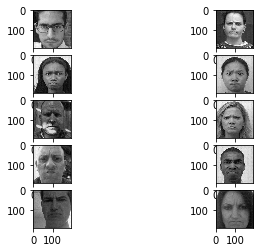

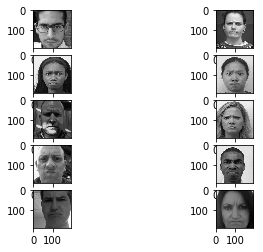

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

x = 1
fig1 = plt.figure()
for img in sqr_imgs['z_normalized_img'][:10]:
    img = img.reshape(192,192)
    fig1.add_subplot(5, 2, x)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    x += 1

x = 1
fig2 = plt.figure()
for img in sqr_imgs['scaled_img2'][:10]:
    img = img.reshape(192,192)
    fig2.add_subplot(5, 2, x)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    x += 1

#### Index 11162 is not a face

[20932, 37258, 14262, 4323, 15303, 14962, 38605, 11487, 4287, 9005]


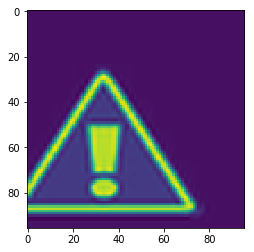

In [32]:
print(sample)
plt.imshow(sqr_imgs.iloc[11162]['scaled_img'].reshape(96,96))

#### dlib returns empty rectangles obj if no faces detected

In [33]:
import dlib

test = np.array([[1,1],[1,1]]).astype(np.uint8)
detector = dlib.get_frontal_face_detector()
dets = detector(test)
print(len(dets))
for i, d in enumerate(dets):
        print(d.left(), d.top(), d.right(), d.bottom())

0


#### How many faces does dlib detect?

It turns out dlib only detects about a third of the faces in the dataset. Might want to look into finding a better face detection module.

In [42]:
import dlib

detector = dlib.get_frontal_face_detector()

def face_detected(img):
    img_copy = img.copy()
    img_copy = img_copy.reshape(img_copy.shape[1], img_copy.shape[2]).astype(np.uint8)
    dets = detector(img_copy)
    
    if len(dets) > 0:
        return True
    else:
        return False

sqr_imgs['face_detected'] = sqr_imgs['scaled_img'].map(face_detected)
print(sqr_imgs['face_detected'].value_counts())    

True     28283
False    11796
Name: face_detected, dtype: int64


[22437, 17751, 950, 2116, 32685, 897, 12001, 39503, 22942, 11827]


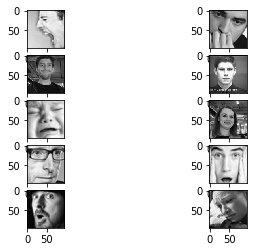

In [47]:
sample2 = random.sample(sqr_imgs[sqr_imgs['face_detected'] == False].index.tolist(), 10)
print(sample2)
fig = plt.figure()
x = 1
for i in sample2:
    fig.add_subplot(5, 2, x)
    img = sqr_imgs.iloc[i]['scaled_img'].reshape(96,96)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    x += 1

### Split into training and test sets

In [48]:
emo = ['Angry', 'Disgust', 'Fear', 'Happy',
           'Sad', 'Surprise', 'Neutral']
print(sqr_imgs['emotion'].value_counts().apply(lambda x: x/len(sqr_imgs)*100))

3    24.511590
6    17.979491
4    16.826767
0    13.338656
2    13.273784
5    11.849098
1     2.220614
Name: emotion, dtype: float64


#### Disgust only makes up 2% of the dataset, so it will be merged into Anger

In [49]:
#remap emotions so they range 0-5
'''
Current emotion map:
emotion_map = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}
'''
def remap(x):
    map = {0:0, 1:0, 2:1, 3:2, 4:3, 5:4, 6:5}
    return map[x]

sqr_imgs['emotion'] = sqr_imgs['emotion'].map(remap)

print(sqr_imgs['emotion'].value_counts().apply(lambda x: x/len(sqr_imgs)*100))

2    24.511590
5    17.979491
3    16.826767
0    15.559270
1    13.273784
4    11.849098
Name: emotion, dtype: float64


#### Split into train, cv, test (60%, 20%, 20%)

In [52]:
from sklearn.model_selection import train_test_split

dlib_dataset = sqr_imgs[sqr_imgs['face_detected'] == True][['normalized_img','emotion']]

X = np.array(dlib_dataset['normalized_img'].values.tolist())
y = np.array(dlib_dataset['emotion'].values.tolist())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
#create cross validation set
print('Training Set:\nX: {}\ny: {}\n'.format(len(X_train), len(y_train)))
print('Test Set:\nX: {}\ny: {}\n'.format(len(X_test), len(y_test)))


Training Set:
X: 19798
y: 19798

Test Set:
X: 8485
y: 8485



#### Convert to categorical arrays, and save to file

In [54]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

print('X:')
print(X_train.shape, X_test.shape)
print('Y:')
print(Y_train.shape, Y_test.shape)

np.save('../data/X_train_scaled_jaffe_ck_dlib', X_train)
np.save('../data/Y_train_scaled_jaffe_ck_dlib', Y_train)
np.save('../data/X_test_scaled_jaffe_ck_dlib', X_test)
np.save('../data/Y_test_scaled_jaffe_ck_dlib', Y_test)

X:
(19798, 1, 192, 192) (8485, 1, 192, 192)
Y:
(19798, 6) (8485, 6)


In [12]:
X_train_fname = '../data/X_train_scaled_jaffe.npy'
Y_train_fname = '../data/Y_train_scaled_jaffe.npy'
X_train_test = np.load(X_train_fname)
Y_train_test = np.load(Y_train_fname)

print([np.sum(Y_train_test[:,i])/Y_train_test.shape[0] for i in range(0,6)])

[0.15243267370926947, 0.13197440857015325, 0.24940485046868024, 0.17315131676833803, 0.11728165451569707, 0.17575509596786193]


### Create dataset using keras image generator

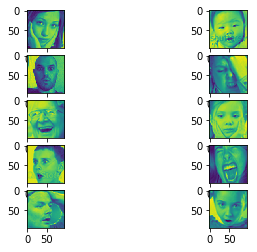

In [46]:
fig = plt.figure()
x = 1
for img in X_train_test[:10]:
    img = img.reshape(96,96)
    fig.add_subplot(5, 2, x)
    plt.imshow(img)
    x += 1 

In [18]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
K.set_image_dim_ordering('th')
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=10,
                             shear_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

datagen.fit(X_train)
print(datagen.flow(X_train, Y_train, batch_size=50000).next()[0].shape)

c:\users\lab\anaconda3\envs\emotion\lib\site-packages\keras\preprocessing\image.py:648: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (26884, 1, 192, 192) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


(26884, 1, 192, 192)
